In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv('Titanic Dataset.csv')

In [5]:
# Calculating the Overall Survival Rate: 
survival_rate = df['survived'].mean()
print("Overall Survival Rate:", survival_rate)

Overall Survival Rate: 0.3819709702062643


# EDA of the Data

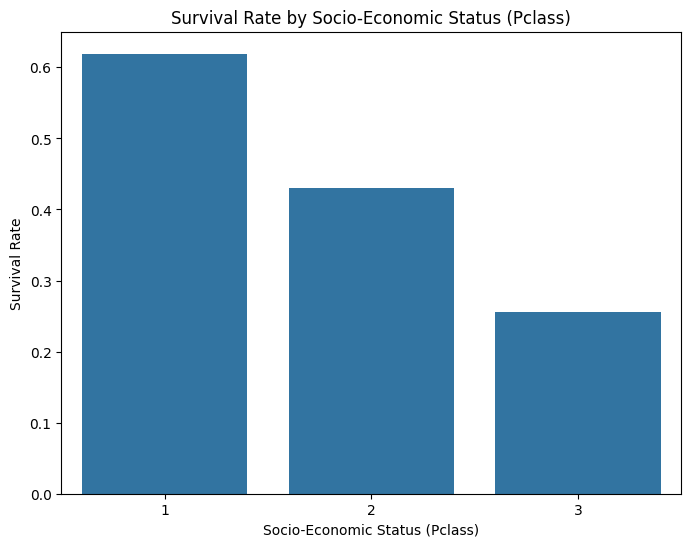

In [8]:
# Visualize survival rate by socio-economic status (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Survival Rate')
plt.show()

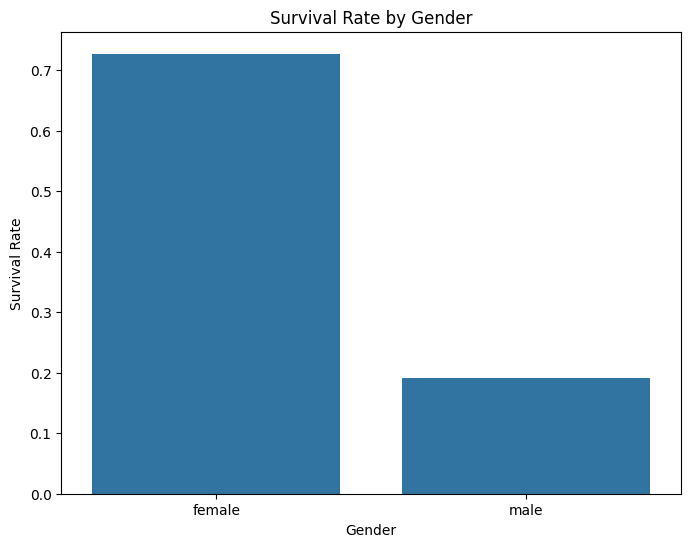

In [12]:
# Visualize survival rate by gender (Sex)
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

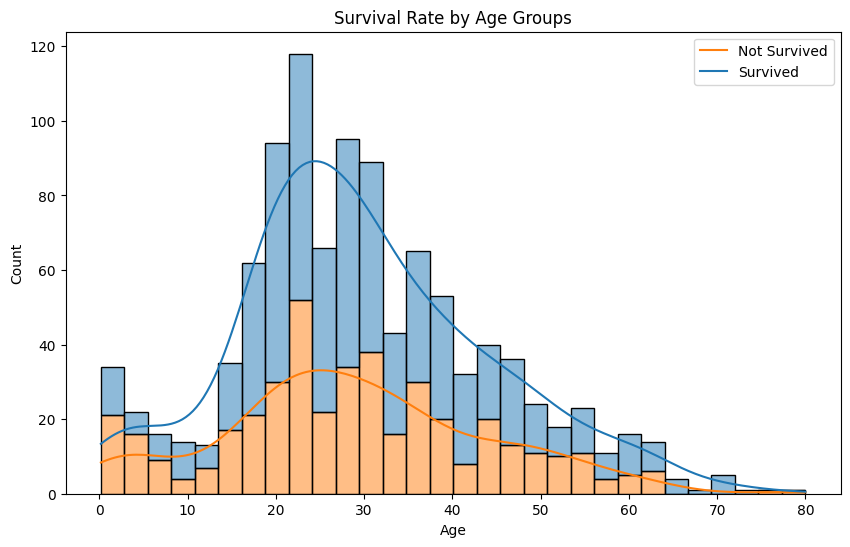

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', bins=30, multiple='stack', kde=True)
plt.title('Survival Rate by Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

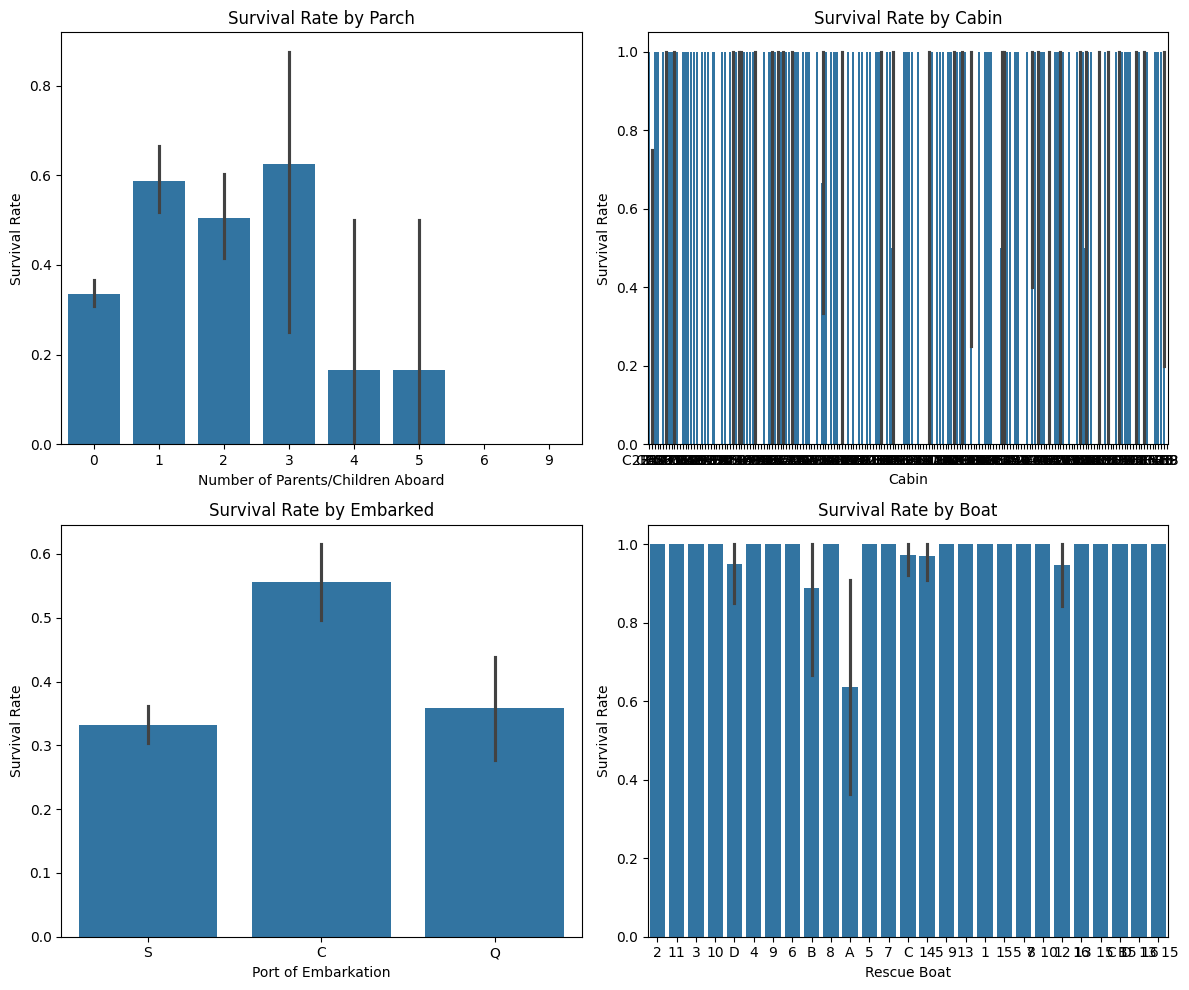

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot survival rates by Parch (Number of Parents/Children Aboard)
sns.barplot(x='parch', y='survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Parch')
axes[0, 0].set_xlabel('Number of Parents/Children Aboard')
axes[0, 0].set_ylabel('Survival Rate')

# Plot survival rates by Cabin
sns.barplot(x='cabin', y='survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Cabin')
axes[0, 1].set_xlabel('Cabin')
axes[0, 1].set_ylabel('Survival Rate')

# Plot survival rates by Embarked (Port of Embarkation)
sns.barplot(x='embarked', y='survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Embarked')
axes[1, 0].set_xlabel('Port of Embarkation')
axes[1, 0].set_ylabel('Survival Rate')

# Plot survival rates by Boat (Rescue Boat Identifier)
sns.barplot(x='boat', y='survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Boat')
axes[1, 1].set_xlabel('Rescue Boat')
axes[1, 1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

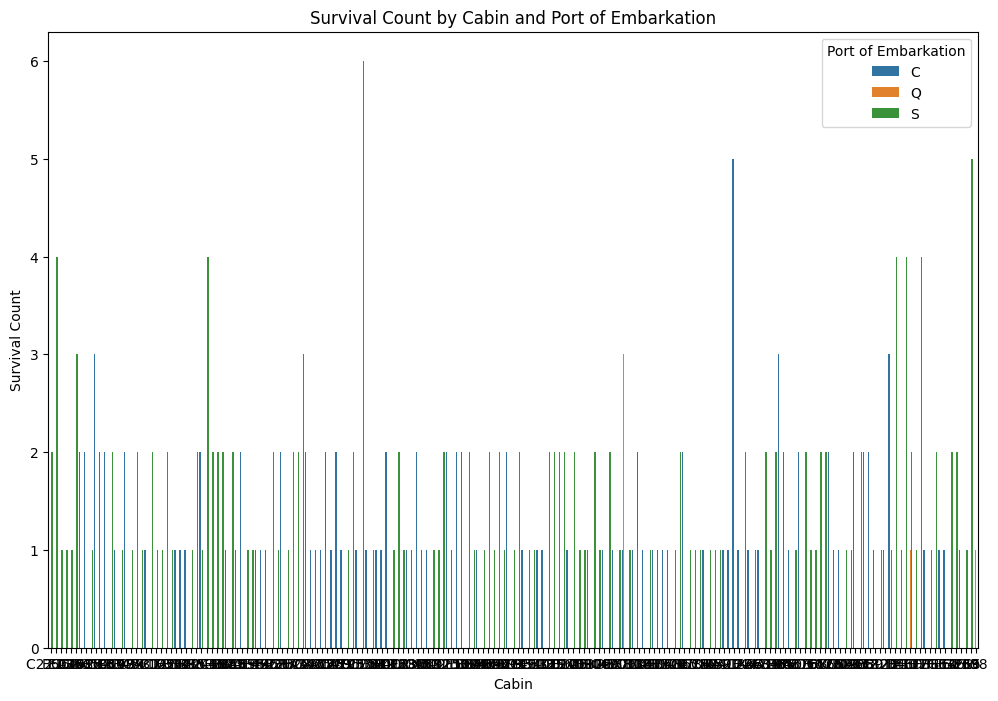

In [18]:
# Filter out rows with missing values in the Cabin or Embarked columns
df_filtered = df.dropna(subset=['cabin', 'embarked'])

# Plot survival rates by Cabin and Port of Embarkation
plt.figure(figsize=(12, 8))
sns.countplot(x='cabin', hue='embarked', data=df_filtered, hue_order=['C', 'Q', 'S'])
plt.title('Survival Count by Cabin and Port of Embarkation')
plt.xlabel('Cabin')
plt.ylabel('Survival Count')
plt.legend(title='Port of Embarkation')
plt.show()

# Recommendation Systems Design

In [26]:
def prioritize_evac(passengers):
    """
    Grouping people based on Sex, and age
    """
    
    women_and_children = passengers[(passengers['sex'] == 'female') | (passengers['age'] < 18)]
    elderly_passengers = passengers[passengers['age'] > 65]

    prioritized_passengers = pd.concat([women_and_children, elderly_passengers])
    prioritized_passengers = prioritized_passengers.drop_duplicates()
    
    return prioritized_passengers

In [24]:
def group_passengers(passengers):
    """
    Group passengers based on socio-economic status, age and gender, and family relations.
    
    Args:
    - passengers (DataFrame): DataFrame containing information about passengers
    
    Returns:
    - grouped_passengers (DataFrame): DataFrame with passengers grouped based on specified criteria
    """
    # Group passengers based on socio-economic status (Pclass)
    # For example, create separate groups for first class, second class, and third class passengers
    first_class_passengers = passengers[passengers['pclass'] == 1]
    second_class_passengers = passengers[passengers['pclass'] == 2]
    third_class_passengers = passengers[passengers['pclass'] == 3]
    
    # Group passengers based on age and gender categories
    # For example, create separate groups for women and children, elderly passengers, and adult males
    women_and_children = passengers[(passengers['sex'] == 'female') | (passengers['age'] < 18)]
    elderly_passengers = passengers[passengers['age'] > 65]
    adult_males = passengers[(passengers['sex'] == 'male') & (passengers['age'] >= 18) & (passengers['age'] <= 65)]
    
    # Group passengers based on family relations
    # For example, keep families together during evacuation
    # You may need to define specific criteria for identifying family relations
    # For example, if 'Family' column exists in the DataFrame indicating family relations
    # grouped_families = passengers.groupby('Family')
    
    # Combine grouped passengers
    grouped_passengers = {
        'First Class': first_class_passengers,
        'Second Class': second_class_passengers,
        'Third Class': third_class_passengers,
        'Women and Children': women_and_children,
        'Elderly Passengers': elderly_passengers,
        'Adult Males': adult_males
    }
    
    return grouped_passengers


In [20]:
def allocate_resources(passengers, predicted_probabilities):
    """
    Allocate resources such as lifeboats, life jackets, and emergency supplies based on predicted survival probabilities.
    
    Args:
    - passengers (DataFrame): DataFrame containing information about passengers
    - predicted_probabilities (array-like): Array containing predicted survival probabilities for each passenger
    
    Returns:
    - resource_allocation (DataFrame): DataFrame with resource allocation information for each passenger
    """
    # Convert the predicted_probabilities array to a pandas Series
    predicted_probabilities_series = pd.Series(predicted_probabilities)

    # Calculate the survival threshold using quantile
    survival_threshold = predicted_probabilities_series.quantile(0.5)
    
    # Reset the index of the passengers DataFrame
    passengers.reset_index(drop=True, inplace=True)
    
    # Filter passengers with survival probabilities above the threshold
    high_priority_passengers = passengers[predicted_probabilities_series >= survival_threshold]

    # Add 'PassengerID' column back to the DataFrame
    passengers.loc[high_priority_passengers.index, 'PassengerID'] = range(len(high_priority_passengers))
    
    # Allocate resources based on the needs and predicted survival probabilities of passengers
    # Here, you can define rules for allocating resources such as lifeboats, life jackets, medical supplies, food, water, etc.
    # For demonstration purposes, let's assume all high-priority passengers get access to lifeboats and life jackets
    resource_allocation = high_priority_passengers[['PassengerID']].copy()
    resource_allocation['Lifeboat'] = 'Yes'
    resource_allocation['LifeJacket'] = 'Yes'
    
    # You can further customize resource allocation based on specific criteria and requirements
    
    return resource_allocation


# Modelling

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv("Titanic Dataset.csv")

# Drop unnecessary columns
df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'sex'], inplace=True)

# Handle missing values
df.dropna(inplace=True)

# One-hot encode the 'embarked' column
embarked_encoded = pd.get_dummies(df['embarked'], prefix='embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df.drop(columns=['embarked'], inplace=True)

# Ensure all columns are numeric
X = df.drop(columns=['survived'])
y = df['survived']

# Train RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Create a sample passenger DataFrame
sample_passenger = {
    'pclass': [1],  # Passenger class
    'age': [25],  # Age
    'sibsp': [1],  # Number of siblings/spouses aboard
    'parch': [1],  # Number of parents/children aboard
    'fare': [100],  # Fare
    'embarked_C': [1],  # Port of embarkation C
    'embarked_Q': [0],  # Port of embarkation Q
    'embarked_S': [0]  # Port of embarkation S
}
X_new = pd.DataFrame(sample_passenger)

# Predict the target variable for the new data
predicted_label = model.predict(X_new)

# Map the predicted label to a human-readable format
prediction_mapping = {0: "likely not survive", 1: "likely survive"}
predicted_result = prediction_mapping[predicted_label[0]]

# Print the result
print("Prediction for the new data:", predicted_result)


Prediction for the new data: likely survive


In [ ]:
new_predictions = model.predict(X_new)

# Combine predictions with passenger information
passenger_info_with_predictions = X_new.copy()  # Copy the passenger information DataFrame
passenger_info_with_predictions['predicted_survived'] = new_predictions  # Add predicted survival column

# Use prioritize_evac function with combined data
evacuation_priority = prioritize_evac(passenger_info_with_predictions)

# Predicting Survival Probabilities

In [62]:
import numpy as np

# Convert the NumPy array to a pandas Series
survival_probabilities_series = pd.Series(survival_probabilities)

# Calculate the survival threshold using quantile
survival_threshold = survival_probabilities_series.quantile(0.5)


In [ ]:
evacuation_priority = prioritize_evac(df)
grouped_passengers = group_passengers(df)
resource_allocation = allocate_resources(df, survival_probabilities)
